# Importing/Storing data

In [1]:
# pip install wfdb

In [2]:
import wfdb
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#print('Current directory is: {}'.format(os.getcwd()))

In [27]:
records = []
properties = []
annot = []
AnnSymb = []
AnnSamp = []
AnnRhythm = []
Rpeak_Samp = []
Rpeak_Symb = []


for f in glob.glob('C:/Users/masud/Desktop/Github_Bachelor_Project/wfdb-python/data/*.dat'): ##### change the path (afib) to your own directory. The rest should 
                                                                                             ##### remin the same
    sig, fields = wfdb.rdsamp(f[:-4], channels=[1])  #### In this function, you have the opportunity to pass 
                                       #### "channels=[0]" or "channels=[1]" to select channel 1 or 2.
    ann = wfdb.rdann(f[:-4], 'atr')
    QRS = wfdb.rdann(f[:-4], 'qrs')
    Symb = pd.Series(ann.symbol)
    Samp = pd.Series(ann.sample)
    QRS_Symb = pd.Series(QRS.symbol)
    QRS_Samp = pd.Series(QRS.sample)
    Rhythm = pd.Series(ann.aux_note)
    records.append(sig)
    properties.append(fields)
    annot.append(ann)
    AnnSymb.append(Symb)
    AnnSamp.append(Samp)
    Rpeak_Symb.append(QRS_Symb)
    Rpeak_Samp.append(QRS_Samp)
    AnnRhythm.append(Rhythm)
    
    

AnnSymb = pd.Series(AnnSymb).values
AnnSamp = pd.Series(AnnSamp).values

In [5]:
#This is only for last record, calculated in above loop
print(ann.aux_note)
print(QRS.sample)

['(N', '(AFIB', '(N', '(AFIB']
[    193     390     586 ... 8999879 8999948 9000001]


# Visualising the ECG signals

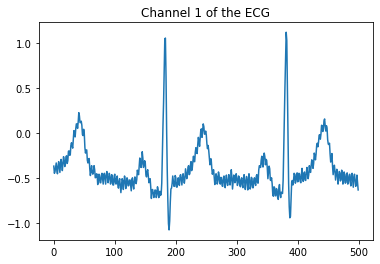

In [28]:
#plt.title("Both Channels (0 and 1)")
#plt.plot(sig[:500])
#plt.title("Channel 0 of the ECG") #Called ['ECG1']
#plt.plot(sig[:500])
plt.title('Channel 1 of the ECG') #Called ['ECG2']
plt.plot(sig[:500])

In [29]:
print(f"Record size (both channels if size --> 18411520): {np.size(records[22])}")

Record size (both channels if size --> 18411520): 9205760


In [8]:
#wfdb.plot_wfdb(record=QRS, annotation=ann, time_units='minutes')
#wfdb.plot.plot_items(signal=records[0], ann_samp=AnnSamp, title='MIT-BIH Atrial Fibrillation Database')

#_signal = 

#wfdb.plot_wfdb(record=all_signals[0], annotation=ann, sampto=1500, 
#              title='MIT-BIH Atrial Fibrillation Database', time_units='seconds')

### Accessing annotations 

In [9]:
display(fields) ### Last record annotation
print(f"Units in which the ECG is measured {fields['units']}")

{'fs': 250,
 'sig_len': 9205760,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['ECG1'],
 'comments': []}

Units in which the ECG is measured ['mV']


In [10]:
display(properties[22])
print(f"Units in which the ECG is measured {properties[22]['units']}")

{'fs': 250,
 'sig_len': 9205760,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['ECG1'],
 'comments': []}

Units in which the ECG is measured ['mV']


# Calculating the R to R Intervals

In [11]:
single_record_rri = []
rri = []
single_record_mean = []
rri_mean = []
single_record_std = []
rri_std = []
single_record_RMSSD = []
RMSSD = []
single_record_nRMSSD = []
nRMSSD = []

squared_summed_differencies = 0
i = 0
for item in Rpeak_Samp:
    single_record_rri = np.diff(Rpeak_Samp[i])
    rri.append(single_record_rri)
    single_record_mean = np.mean(single_record_rri)
    rri_mean.append(single_record_mean)
    single_record_std = np.std(single_record_rri)
    rri_std.append(single_record_std)
    
    # to estimate HRV in a specified intervals of an ECG
    #Root mean square of successive differences = RMSSD

    #range -1, gives no error out of bound, because of index i+1 inside the loop. (range = 59550)
    for k in range(len(single_record_rri)-1):
        squared_summed_differencies += (single_record_rri[k+1] - single_record_rri[k])**2

    squared_summed_differencies_multiplied = 1/(len(single_record_rri)-1) * squared_summed_differencies
    single_record_RMSSD = np.sqrt(squared_summed_differencies_multiplied)
    RMSSD.append(single_record_RMSSD)
    single_record_nRMSSD = (single_record_RMSSD / single_record_mean)
    nRMSSD.append(single_record_nRMSSD)
    
    squared_summed_differencies = 0
    i += 1

### Only result for last record

In [12]:
print(f"R-R intervals: {single_record_rri}")
print(f"Mean: {np.around(single_record_mean,3)}")
print(f"Standard deviation: {np.around(single_record_std,3)}")
print(f"RMSSD: {np.around(single_record_RMSSD,3)}")
print(f"Normalized RMSSD: {np.around(single_record_nRMSSD,5)}")

R-R intervals: [197 196 196 ...  68  69  53]
Mean: 151.128
Standard deviation: 41.324
RMSSD: 42.482
Normalized RMSSD: 0.2811


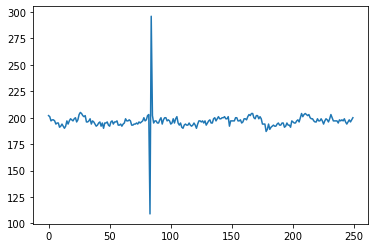

In [42]:
#A sample of 250 elements, gives 1 clear signal (because 250hz frequency)
x = np.arange(0,250)
plt.plot(x,rri[22][750:1000])

# Segmenting the records into 10-20 heart beats samples

In [15]:
#seg_all_rec = []

#amount_to_segment = -(len(rri[0]) % 20)
#record_to_segment = rri[0][:amount_to_segment]
#length = len(record_to_segment) / 20
#segmented_record = np.split(record_to_segment,length)
#seg_all_rec.append(segmented_record)

In [16]:
segmented_all_records = []

### TO acess every single record
### record_to_segment = rri[index]
for index in range(len(rri)):
    #(below line) gives a value between 0 and 19, which is the amount used to remove from the end of a record, by slicing.
    amount_to_segment = -(len(rri[index]) % 20)
    if amount_to_segment != 0:
        record_to_segment = rri[index][:amount_to_segment]
    else: 
        record_to_segment = rri[index] #if divisible by 20, no need to slice this record
    #(below line) gives us the number of "blocks" to put every single 20-segment into.
    length = len(record_to_segment) / 20
    segmented_record = np.split(record_to_segment,length)
    segmented_all_records.append(segmented_record)

### Accessing the 23 individual records (index 0 to 22), gives a single record, that is segmented into arrays of 20. Accessing each 20 array segment by indexing, this time second dimension [ ]-->[ ]<--

In [17]:
n = 3; m = 0
print(f"Record nr {n}, and index {m} in that record: {segmented_all_records[n][m]}")

Record nr 3, and index 0 in that record: [195 196 192 193 202 210 209 199 193 200 198 198 193 187 193 198 201 193
 188 193]


In [18]:
np.shape(segmented_all_records[0])

(2200, 20)